# Stemming
Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. For those interested, there's some background on this decision [here](https://github.com/explosion/spaCy/issues/327). We discuss the virtues of *lemmatization* in the next section.

Instead, we'll use another popular NLP tool called **nltk**, which stands for *Natural Language Toolkit*. For more information on nltk visit https://www.nltk.org/

## Porter Stemmer

One of the most common - and effective - stemming tools is [*Porter's Algorithm*](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter in [1980](https://tartarus.org/martin/PorterStemmer/def.txt). The algorithm employs five phases of word reduction, each with its own set of mapping rules. In the first phase, simple suffix mapping rules are defined, such as:

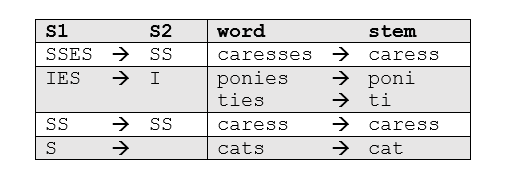

From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, `caresses` reduces to `caress` but not `cares`.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

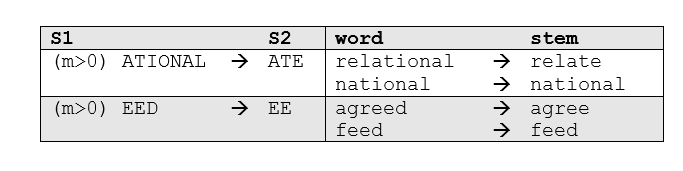

Here `m>0` describes the "measure" of the stem, such that the rule is applied to all but the most basic stems.

In [ ]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [ ]:
p_stemmer = PorterStemmer()

In [ ]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [ ]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


<font color=green>Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"</font>
___

## Snowball Stemmer
This is somewhat of a misnomer, as Snowball is the name of a stemming language developed by Martin Porter. The algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since **nltk** uses the name SnowballStemmer, we'll use it here.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [ ]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [ ]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


<font color=green>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>
___

## Try it yourself!
#### Pass in some of your own words and test each stemmer on them. Remember to pass them as strings!

In [ ]:
words = ['consolingly']

In [ ]:
print('Porter Stemmer:')
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

Porter Stemmer:
consolingly --> consolingli


In [ ]:
print('Porter2 Stemmer:')
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

Porter2 Stemmer:
consolingly --> consol


___
Stemming has its drawbacks. If given the token `saw`, stemming might always return `saw`, whereas lemmatization would likely return either `see` or `saw` depending on whether the use of the token was as a verb or a noun. As an example, consider the following:

In [ ]:
phrase = 'I am meeting him tomorrow at the meeting'
for word in phrase.split():
    print(word+' --> '+p_stemmer.stem(word))

I --> I
am --> am
meeting --> meet
him --> him
tomorrow --> tomorrow
at --> at
the --> the
meeting --> meet


Here the word "meeting" appears twice - once as a verb, and once as a noun, and yet the stemmer treats both equally.